In [10]:
#Compilation File

#Goal:
#Essentially follow the technology timeline with a fleshed out, generated timeline with culture, kingdom, language, city development.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import sympy as sym
from tqdm import tqdm
from scipy.optimize import curve_fit #used for curve fitting
import random
import math

In [12]:
gen_human = 27
gen_astar = 120
gen_waith = 2000

336.14942528735634 253.96513149822573
26640.0
Mean civ length, astar:  26640.0


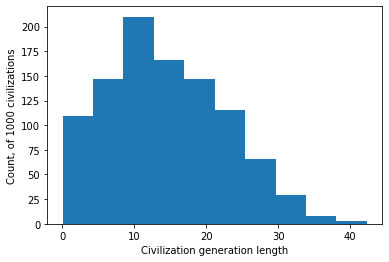

In [13]:
human_empires = [505,405,501,827,800,400,187,157,500,500,46,241,313,322,210,299,250,250,478,400,1000,70,342,220,1000,661,351,298,700,225,1150,404,330,411,244,203,43,144,364,87,66,540,800,200,667,220,461,24,302,265,177,137,249,500,500,90,469,450,14,184,197,156,735,442,120,112,370,1100,45,725,140,525,195,200,70,290,250,90,100,350,30,130,100,240,90,220,70]

hea = np.mean(human_empires) #human empire average
hes = np.std(human_empires) #std
print(hea,hes)

#Average civilization is ~300 years for humans
civ_len_gen = hea/gen_human
civ_len_std = hes/gen_human

def get_civ_rand():
    civlen = -1
    while civlen < 0:
        civlen = np.random.normal(loc=civ_len_gen,scale=civ_len_std)
    return civlen


civlenlist = []
for i in range(0,1000):
    newciv = get_civ_rand()
    if newciv > 0:
        civlenlist.append(newciv)
    
plt.hist(civlenlist)
plt.xlabel("Civilization generation length")
plt.ylabel("Count, of 1000 civilizations")

#make a list of astar civilization lengths
astar_civ_lens = []
for civ in range(0,1):
    astar_civ_lens.append(np.round(gen_waith*get_civ_rand()))
    print(astar_civ_lens[-1])
    
print("Mean civ length, astar: ",np.mean(astar_civ_lens))

civ_len = astar_civ_lens[0]

In [19]:
def printtechs(techs,con_shift=0):
    for i in range(0,len(techs)):
        print(techs[i][0],round(techs[i][1])+con_shift)

def shifttechs(techs,con_shift=0):
    for i in range(0,len(techs)):
        techs[i][1] = round(techs[i][1])+con_shift
    return techs

def gettechs(techs,mod):
    for i in range(0,len(techs)):    
        techs[i][1] = round(techs[i][1]*mod)
    return techs

def get_index(name,techlist):
    for i in range(0,len(techlist)):
        if techlist[i][0] == name:
            return i
    print("No match for that tech name")
    return 0

#Tech levels defined as their name followed by the year they were developed (Before Present)
#Tech levels defined as their name followed by the year they were developed (Before Present)
c = 2000
tech_earth = [
["Daily usage of fire",300000],
["Fictive language",70000],
["Surface mining",45000],
["Non-sailing boats",42000],
["Shaft mining",40000],
["Pottery",20000],
["Obsidian trade networks",14000],
["Neolithic period", 12000],
["Settlement size: 100",12000],
["Agriculture", 12000],
["Animal Husbandry",12000],
["Archery",12000],
["Timekeeping",12000],
["Granaries appear",11500],
["Non-burial spiritual architecture",11000],
["Proto-writing",9000],
["Settlement size: 800",9000],
    
["\nCharcolithic period",8000],
["Copper working",8000],
["Early textiles",8000],
["Settlement size: 4000",8000],
["Early Proto-Indo-European Millenium", 7500],
["Trapping",7500],
["Carpentry",7500],
["Founding of Eridu",7400],
["Founding of Uruk",6500],
["Late Proto-Indo-European Millenium", 6000],
["Significant Masonry",6000],
["Paved roads",6000],
["Earliest complex civilizations",6000],
["Founding of Ur",5800],
    
["\nBronze Age",5500],
["Spear and shield formations",5500],
["Wheel",5500],
["Horseback riding",5500],
["Bronze working in Mesopotamia",5500],
["Writing",5400],
["Uruk has 40,000 residents, 90,000 near",5100],
["Unification of Egypt",5100],
["Modern calendar",5000],
["Polytheistic religions",5000],
["Early mathematics",5000],
["Ocean Sailing",5000],
["Post and Lintel construction",5000],
["Early currency",5000],
["Eridu at largest point",4900],
["Early Sumerian Dynastic Period",4900],
["First Egyptian Stepped Pyramid",4780],
["First standing armies",4600],
["Earliest libraries",4600],
#["Bronze working",4500],
["Chariot driving",4500],
["Indus-Mesopotamian trade",4500],
["Great pyramids",4500],
["Akkadian Empire",4330],
["End of Old Kingdom in Egypt",4200],
["Ziggurat of Ur build",4100],
["Ur over 65,000 people",4030],
["Old Assyrian Empire",4030],
["Approx. Equiv. Time of Mesoamerican Megaliths",4000],
["Eridu abandoned",4000],
["Assyrian merchant colony at Kanesh",3900],
["Greek agora markets",3800],
["Limited iron production",3700],
["Early swords",3700],
["Ugarit",3600],
["Middle Assyrian Empire",3390],
["Early engineering",3300],
    
["\nIron Age",3200],
["Large-scale iron working, common swords",3200],
["Standardized coinage",2900],
["Neo Assyrian Empire",2900],
["Lens",2800],
["Islamic State university",2860],
["Settlement of collony of Carthage",2814],
["Philosophy",2600],
["Study of Mathematics",2600],
["Construction",2600],
["Drama and poetry",2600],
["Courthouses",2500],
["Ur abandoned",2500],
["Alchemy",2500],
["Catapults, trebuchet, and gear technology",2400],
["Platonic Academy",2380],
["Optics",2300],
["Trade guilds",2300],
["Water wheels",2300],
["Roman Engineering",2200],
["Composite bows",2200],
["Meritocracy",2200],
["Systemization of medecine and surgery",2200],

["\nSteel Age, steel in common use",2100],
["Woodblock printing",c-300],
["Fall of Western Roman Empire",c-500],
["Mechanical clocks",c-725],
["Medieval castles",c-850],
["Physics studied",c-1021],
["University",c-1088],
["First crusade",c-1095],
["Compass first utilized",c-1100],
["Crossbows common",c-1100],
["Chivalric code",c-1170],
["Notre Dame constructed",c-1170],
["Windmills",c-1170],
["Early cannons",c-1260],
["Longswords frequently used in combat",c-1300],

["\nJoin-stock companies",c-1350],
["Exchange markets",c-1350],
["Rennaisance",c-1400],
["Banking",c-1407],
["Printing press",c-1440],
["Museums",c-1471],
["Astrolabe",c-1480],
["Beginning of the Scientific Revolution",c-1543],
["Muskets",c-1550],
["Metallurgy",c-1556],
["Telescopes",c-1609],
["Acoustics",c-1637],
["Founding of the Royal Society",c-1660],
["Scientific Theory, publication of Principia",c-1687],
["Military Academies",c-1700],
["Steam Engine",c-1712],
["The Factory System",c-1760],
["Chemistry",c-1789],

["\nArchaelogy",c-1800],
["Railroad",c-1811],
["Electric Motor",c-1821],
["Artificial Fertilizer",c-1842],
["Widespread Rifling",c-1850],
["Oil Drilling",c-1858],
["Theory of Evolution",c-1859],
["Gas refrigeration",c-1860],
["Gatling Gun",c-1861],
["Ecology",c-1866],
["Dynamite",c-1867],
["Automobiles",c-1886],
["Aluminium common",c-1888],
["Modern Artillery",c-1897],

["\nSubmarines",c-1900],
["Broadway Theatre",c-1900],
["Radio Broadcast",c-1906],
["Military Planes",c-1914],
["Replaceable Parts",c-1900],
["Commercial Airports",c-1920],
["Atomic Theory",c-1927],
["Complex electronics",c-1929],
["Machine guns",c-1934],
["Radar",c-1934],
["Plastics",c-1939],
    
["\nPenicillin",c-1942],
["Atomic Bombs",c-1945],
["Turing Machines",c-1946],
["Nuclear Power Plants",c-1954],
["SAM system",c-1954],
["Advanced Ballistics",c-1957],
["Telecommunications",c-1958],
["Radar Stealth",c-1958],
["Satellites",c-1960],
["Modern Tanks",c-1960],
["Lasers",c-1960],
["Particle Physics",c-1974],
["Internet",c-1990]
]

In [20]:
#Let's build our standard basis: generation time on Earth.
tech_gens = copy.deepcopy(tech_earth)
for i in range(0,len(tech_gens)):    
    tech_gens[i][1] = round(tech_gens[i][1]/gen_human)

In [21]:
def hex_to_area(hex_num):
    hex_width = 40 #hex width in km
    hex_area = (hex_width*0.9306049)**2
    return hex_area*hex_num
def area_to_hex(area):
    hex_width = 40 #hex width in km
    hex_area = (hex_width*0.9306049)**2
    hex_num = area/hex_area
    return hex_num

def area_by_pop(pop_total,pop_rho):
    #Method 1: Use the total population to find the region's area
    region_area = pop_total/pop_rho #in kilometers
    
    hex_num = area_to_hex(region_area)
    print("Total population of the region: ",pop_total)
    print("Total area of the region: ",np.round(region_area,2),"sq km or",'{:e}'.format(region_area) ,"; in hexes: ",hex_num)
    #print("Total area of the region, square km: ",region_area_km," or ",'{:e}'.format(region_area_km))
    print("Total area of the region, square Mm: ",np.round(region_area/1e6,2))
    return region_area

def pop_by_area(hex_num,pop_rho):
    #Method 2: Use the hex num to find the region's area and total population
    #equation: total_pop = A*rho; A = total_pop / rho    

    region_area = hex_to_area(hex_num) #in square miles
    pop_total = round(region_area*pop_rho)
    print("Total population of the region: ",pop_total)
    print("Total area of the region: ",region_area,"square km; in hexes: ",hex_num)
    return [pop_total,region_area]

def pop_by_area_sqkm(area,pop_rho):
    #Method 2: Use the square kilometer area to find total population
    #equation: total_pop = A*rho; A = total_pop / rho    

    region_area = area 
    pop_total = round(region_area*pop_rho)
    print("Total population of the region: ",pop_total)
    print("Total area of the region: ",region_area,"square km")
    return pop_total

def geograph_dist(pop_total,region_area,era=0,support_factor=180):
    
    #Population spread

    #village bounds: 20 - 1000; commonly 50 - 300
    village_avg = 150
    #town bounds: 1000 - 8000; commonly 2500
    town_avg = 2500
    town_lbound = 1000
    #city bounds: 8000 - 12000
    city_lbound = 8000
    #big city bounds: 12000 - 100000

    settlements = []
    #randomly generate population of the largest city
    #era 0 = neolithic
    if era==0:
        settlements.append(round(np.sqrt(pop_total)*(random.randint(1,4)+random.randint(1,4)+0)))
    else:
        settlements.append(round(np.sqrt(pop_total)*(random.randint(1,4)+random.randint(1,4)+10)))    
    #pop_largest_city = round(np.sqrt(pop_total)*(random.randint(1,4)+random.randint(1,4)+10))
    print("Population of the largest city: ",settlements[0])
    #settlements.append(25400)
    settlements.append(round(settlements[0]*(random.randint(1,4)+random.randint(1,4))*0.1))
    print("Population of the second largest city: ",settlements[1])

    #Next we can use the largest and second largest settlements to gernerate the rest.
    #For a post-Crusades style society with a robust mercantile system, there are a large number
    #of towns corresponding to each city. However for pre-Crusades systems, where trade is typically
    #localized, there is a much smaller number of towns. More people are rural in this system.
    #era 1 = post-mercantile / post crusades time
    if era==1:
        multiplier = 1-((random.randint(1,4)+random.randint(1,4))*0.05)
        while round(settlements[-1]*multiplier) >= city_lbound:
            settlements.append(round(settlements[-1]*multiplier))
            multiplier = 1-((random.randint(1,4)+random.randint(1,4))*0.05)
            #print(settlements)
        print("Array of notable cities: ",settlements)

        #Next level down: towns.
        cities = [x for x in settlements if x > city_lbound]
        towns_num = len(cities)*(random.randint(1,8)+random.randint(1,8))
        print("Number of towns: ",towns_num, "each with avg pop: ",town_avg)
        towns_total = towns_num*town_avg
        print("Total population of towns: ",towns_total)

        total_urban_pop = towns_total+sum(settlements) 
    else:
        multiplier = 1-((random.randint(1,4)+random.randint(1,4))*0.05)
        while round(settlements[-1]*multiplier) >= town_lbound:
            settlements.append(round(settlements[-1]*multiplier))
            multiplier = 1-((random.randint(1,4)+random.randint(1,4))*0.05)
            #print(settlements)
        print("Array of notable cities and towns: ",settlements)

        #Next level down: towns.
        towns = [x for x in settlements if x < city_lbound]
        towns_num = len(towns)
        print("Number of towns: ",towns_num)
        towns_total = sum(towns)
        print("Total population of towns: ",towns_total)

        total_urban_pop = sum(settlements)

    if towns_num > 0:    
        town_rho = region_area / towns_num
    else:
        town_rho = region_area        

    print("Total urban population: ",total_urban_pop)
    total_rural_pop = pop_total - total_urban_pop
    print("Total rural population: ",total_rural_pop)
    village_num = round(total_rural_pop/village_avg)

    #From a Magical Medieval Society
    manor_num = round(total_rural_pop/450)
    print("Estimate of the number of small villages: ",village_num)
    print("Estimate of the number of manors: ",manor_num)
    print("Estimate of the number of small villages per manor: ",village_num/manor_num)
    print("Number of square km per town: ",town_rho)
    
    #Distribution of Land
    #How much land is arible vs wilderness? An average square mile of arable farmland
    #can support 180 people. This number can vary with the amount of magic available to the society or
    #other environmental factors.
    support_factor = support_factor*0.3861018
#    support_factor = 180*0.3861018 # per square MILE, to convert to square km, need to multiply by 0.3 ish 
    farmland = round(pop_total / support_factor)
    print("Amount of cultivated land: ", farmland," sq km.")
    print("This is ", round((farmland/region_area)*100),"% of the total region's area.")

    if era==1:
        if towns_num > 0:
            print("Number of square km per town considering only cultivated land: ",round(farmland / towns_num))
            print("Number of km between towns within a cluster: ", round(np.sqrt(farmland / towns_num)))
        else:
            print("Number of square km per town considering only cultivated land: ",farmland)
            print("Number of km between towns within a cluster: ", round(np.sqrt(farmland)))
    else:
        print("Number of square km per town considering only cultivated land: ",round(farmland / len(settlements)))
        print("Number of km between towns within a cluster: ", round(np.sqrt(farmland / len(settlements))))


In [22]:
def growth(init_pop,num_years,rate_choice):
    exp_fun = lambda init_pop,g_rate,x: init_pop*np.exp(g_rate*x)
    xarray = np.linspace(0,num_years,100)
    #print("Number alive at the end of those years: ","{:e}".format(np.round(exp_fun(init_pop,rate_choice,xarray)[-1],0)))
    #print("Growth: ","{:e}".format(np.round(exp_fun(init_pop,rate_choice,xarray)[-1] - init_pop)))
    return np.round(exp_fun(init_pop,rate_choice,xarray)[-1],0)

1. Identify the initial population, initial year, length of time the political state will endure, initial technology level
   
    -variables: pop,year,civ_len, techs
    
    -functions: civ_len_gen

2. Identify the growth rate and population density from region- and time-specific context.

    -variables: growth_rate, pop_rho

(2.5). (Possibly) identify initial area.

3. Compute initial demographics

    -functions: demographic funcs
    
4. Compute final population and final demographics

    -variables: civ_len, pop, growth rate
    -functions: pop growth funcs, demographic funcs
    
5. From the geographic usage demographic of final vs initial, determine if new states bud off and gain insight into the fall of the kingdom

6. From excess population/area from final vs initial demographic analysis, pseudo-randomly determine the number of new political states radiated

    -functions: new! political state radiation function

7. Output final kingdom rise-fall results. Desired values: rise year, fall year. Rise/Fall demographics. # New radiated states.

In [30]:
init_year = 79500 #[ BBT year, Current age ]
init_pop = 200000#152000 #Population of astar in Perakor at the time of the Atanosta
#civ_len = np.round(gen_astar*get_civ_rand())
civ_len = 24500#48400
final_year = init_year-civ_len

#---------------------------------------------------------------------------
#Already developed techs
tech = copy.deepcopy(tech_gens)
tech = gettechs(tech,gen_waith)

shift_index = get_index("Ocean Sailing",tech_astar)#get_index("Neolithic period",tech_astar)
shift_rel_year = 90000#73000
shift = shift_rel_year - tech[shift_index][1]

tech = shifttechs(tech,shift)

tech_development_years = [x[1] for x in tech]

deved_techs = tech[ :len([x for x in tech_development_years if x >= init_year])]
final_deved_techs = tech[ :len([x for x in tech_development_years if x >= final_year])]
#---------------------------------------------------------------------------

growth_rate = 0.0036/100#0.02/100 #up to 0.08/100, typically. 0.08/100 represents e28 standard.
final_pop = growth(init_pop,civ_len,growth_rate)

if "Founding of Eridu" not in [x[0] for x in deved_techs]:
    pop_rho = 0.1 #min 0.03, up to 0.6. population density per sq km
elif "Founding of Eridu" in [x[0] for x in deved_techs]:
    pop_rho = 0.5 #up to 1. population density per sq km
elif "Founding of Uruk" in [x[0] for x in deved_techs]:
    pop_rho = 2 #up to 3 maybe.
elif "Great Pyramids" in [x[0] for x in deved_techs]:
    pop_rho = 7
elif "Iron Age" in [x[0] for x in deved_techs]:
    pop_rho = 9 #estimate from Our World in Data
elif "Roman Engineering" in [x[0] for x in deved_techs]:
    pop_rho = 15 #up to 30 for empire center.

    
if "First crusade" in [x[0] for x in deved_techs]:
    era=1
else:
    era=0
    
    
    
print("SUMMARY-----------------------------------")
print("Political state beginning: ",init_year," BBT")
print("Political state collapse: ",final_year," BBT")
print("Political state duration: ",civ_len," years\n")
new_techs = [x for x in final_deved_techs if x not in deved_techs]
print("New technologies possible: ", new_techs,'\n')
    
print("--------------------------------------------------")
print("Initial year: ",init_year," BBT")
print("Initial developed technologies: ",deved_techs,"\n")
print("Initial population: ",init_pop)
print("\nInitial Demographics:\n")
init_region_area = area_by_pop(init_pop,pop_rho)
#print("Initial region area: ",init_region_area," sqkm\n")
geograph_dist(init_pop,init_region_area,era)
print("\n\n")
    
    
print("--------------------------------------------------")
print("Final year: ",round(final_year)," BBT")
if len(final_deved_techs) > len(deved_techs):
    print("\nNEW TECHNOLOGY: ",new_techs,"\n")

print("\nFinal Demographics:\n")
fin_region_area = area_by_pop(final_pop,pop_rho)
#print("Final region area: ",fin_region_area," sqkm\n")
geograph_dist(final_pop,fin_region_area,era)
print("\n\n")

#if "Earliest complex civilizations" in [x[0] for x in deved_techs]:
#    region_overflow

SUMMARY-----------------------------------
Political state beginning:  79500  BBT
Political state collapse:  55000  BBT
Political state duration:  24500  years

New technologies possible:  [['First Egyptian Stepped Pyramid', 74000], ['First standing armies', 60000], ['Earliest libraries', 60000]] 

--------------------------------------------------
Initial year:  79500  BBT
Initial developed technologies:  [['Daily usage of fire', 21942000], ['Fictive language', 4906000], ['Surface mining', 3054000], ['Non-sailing boats', 2832000], ['Shaft mining', 2682000], ['Pottery', 1202000], ['Obsidian trade networks', 758000], ['Neolithic period', 608000], ['Settlement size: 100', 608000], ['Agriculture', 608000], ['Animal Husbandry', 608000], ['Archery', 608000], ['Timekeeping', 608000], ['Granaries appear', 572000], ['Non-burial spiritual architecture', 534000], ['Proto-writing', 386000], ['Settlement size: 800', 386000], ['\nCharcolithic period', 312000], ['Copper working', 312000], ['Early te